In [508]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# import requests
# import gmaps
# import os

# # Import API key
# from keys import g_key
# gmaps.configure(api_key=g_key)

# Mission: 
# State population vs air quality (CO2 emissions) - Asia 
# Include percentages/fractions for population & emissions
# Line graph of 5 states 
# Box and whiskers for population/emissions outliers

capitals_csv = pd.read_csv('Census Data/us-capitals.csv', usecols=['abbrev', 'state'])
population_csv = pd.read_csv('Census Data/state_population_data.csv', usecols=['State', 'Population'])
population_csv.columns = map(str.lower, population_csv.columns)
population_csv.dropna(axis="rows", how="any", inplace=True)
clean_df = capitals_csv.merge(population_csv, on='state')
states = clean_df.loc[clean_df["state"].isin(['Ohio', 'Pennsylvania', 'Texas', 'Washington', 'Vermont'])]
states

,abbrev,state,population
34,OH,Ohio,11613423
37,PA,Pennsylvania,12802503
42,TX,Texas,27469114
44,VT,Vermont,626042
46,WA,Washington,7170351


In [509]:
# Here, I combined two csv's to save on a bit of time
# I knew I'd need the abbreviations for each state 
# That way I could merge with the emissions data later 
# First I wanted a clean chart for a population bar graph

In [510]:
emissions_csv = pd.read_csv('input_data/emissions.csv')
emissions = emissions_csv.rename(columns={'State': 'abbrev'})
state_emissions = emissions.loc[emissions['abbrev'].isin(['OH', 'PA', 'TX', 'WA', 'VT'])]
state_emissions

,abbrev,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
35,OH,259.915008,234.975715,247.141718,235.368188,215.376323,229.601220,231.666146,212.891632,206.407588,205.621802
38,PA,267.457907,242.407980,254.419583,247.126263,236.353959,246.092075,245.894238,229.691958,216.636771,216.650887
43,TX,643.698700,611.110086,648.818958,666.708188,662.002423,696.845756,693.485215,693.100945,695.363753,710.994283
45,VT,5.901652,6.132742,5.854555,5.782272,5.430809,5.720077,5.867586,6.125115,5.917026,5.833906
47,WA,75.157759,72.977136,73.044555,68.149752,67.912628,72.679159,71.204237,73.062390,78.443075,78.732677


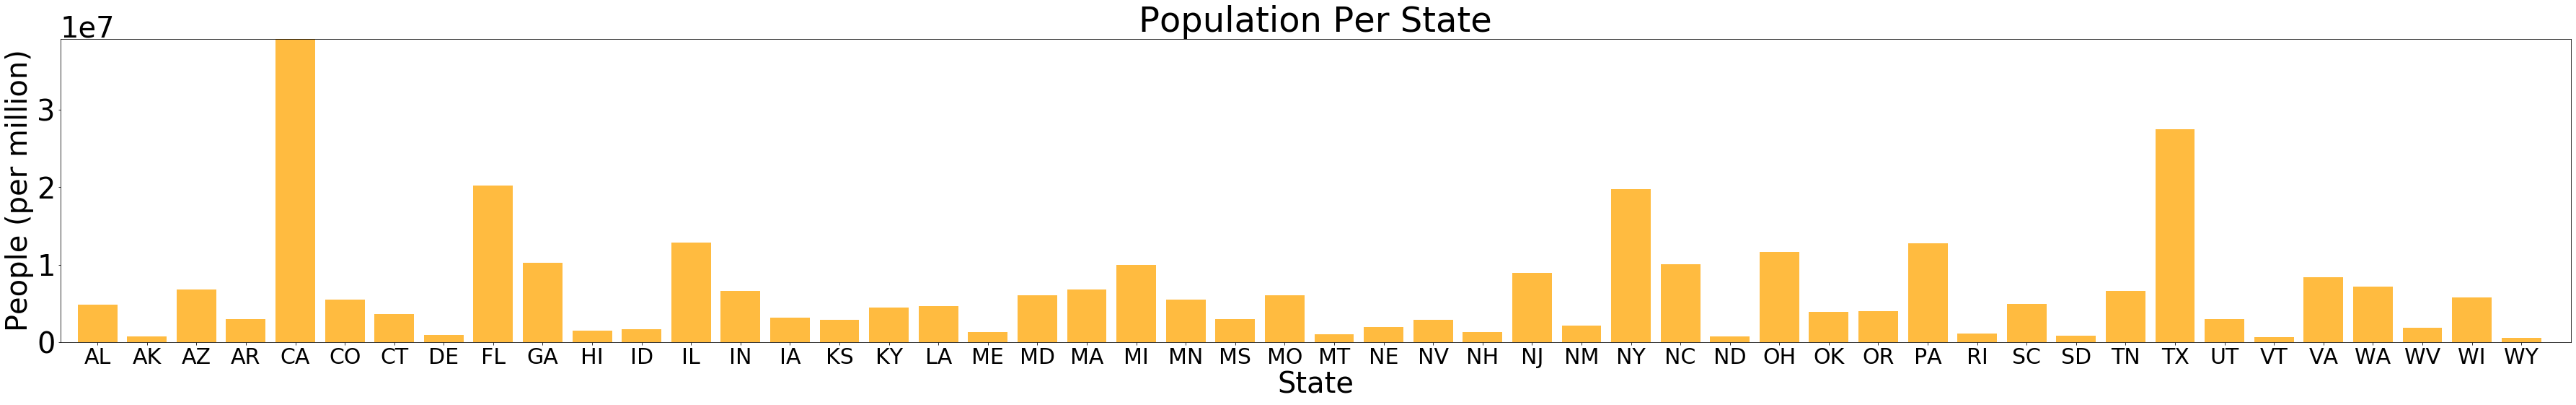

In [511]:
x_axis = np.arange(len(clean_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(50,8))
plt.bar(x_axis, clean_df["population"], color='orange', alpha=0.75, align="center")
plt.xticks(tick_locations, clean_df["abbrev"], fontsize='30')
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(clean_df["population"]))
plt.tight_layout()
plt.title("Population Per State")
plt.xlabel("State")
plt.ylabel("People (per million)")
matplotlib.rcParams.update({'font.size': 40})
plt.show()

# California has a population of 39144818 

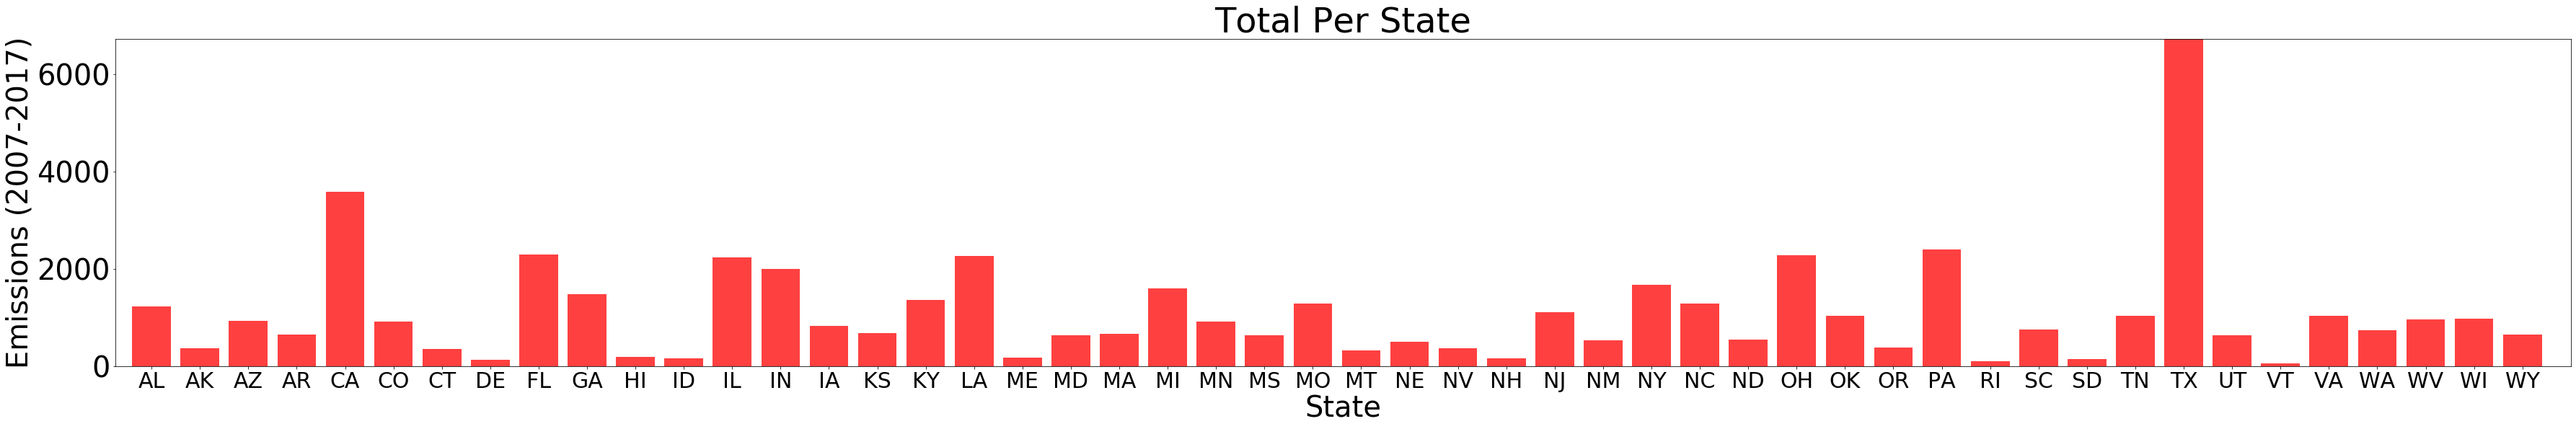

In [512]:
# # I'm curious to see the averages for the emissions data over each year
# # I would also like to plot it by state...

emissions['total'] = emissions.sum(axis=1)
ttl_emissions = emissions.drop(emissions.index[7])
ttl_emissions

# For some reason DC was giving me errors so I dropped it from both datasets

x_axis = np.arange(len(ttl_emissions))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(50,8))
plt.bar(x_axis, ttl_emissions["total"], color='red', alpha=0.75, align="center")
plt.xticks(tick_locations, ttl_emissions["abbrev"], fontsize='30')
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(ttl_emissions["total"]))
plt.tight_layout()
plt.title("Total Per State")
plt.xlabel("State")
plt.ylabel("Emissions (2007-2017)")
matplotlib.rcParams.update({'font.size': 40})
plt.show()

# So there are quite a few states that threw me for a loop 
# I expected California to be the highest poluter since it has the highest population, but Texas is...
# States like Louisiana, Indiana, and West Virginia saw higher emissions rates despite their small populations

In [548]:
# I had to make another column to match the data limits for this bar plot
clean_df['per 1'] = round((clean_df['population'])/100000, 2)

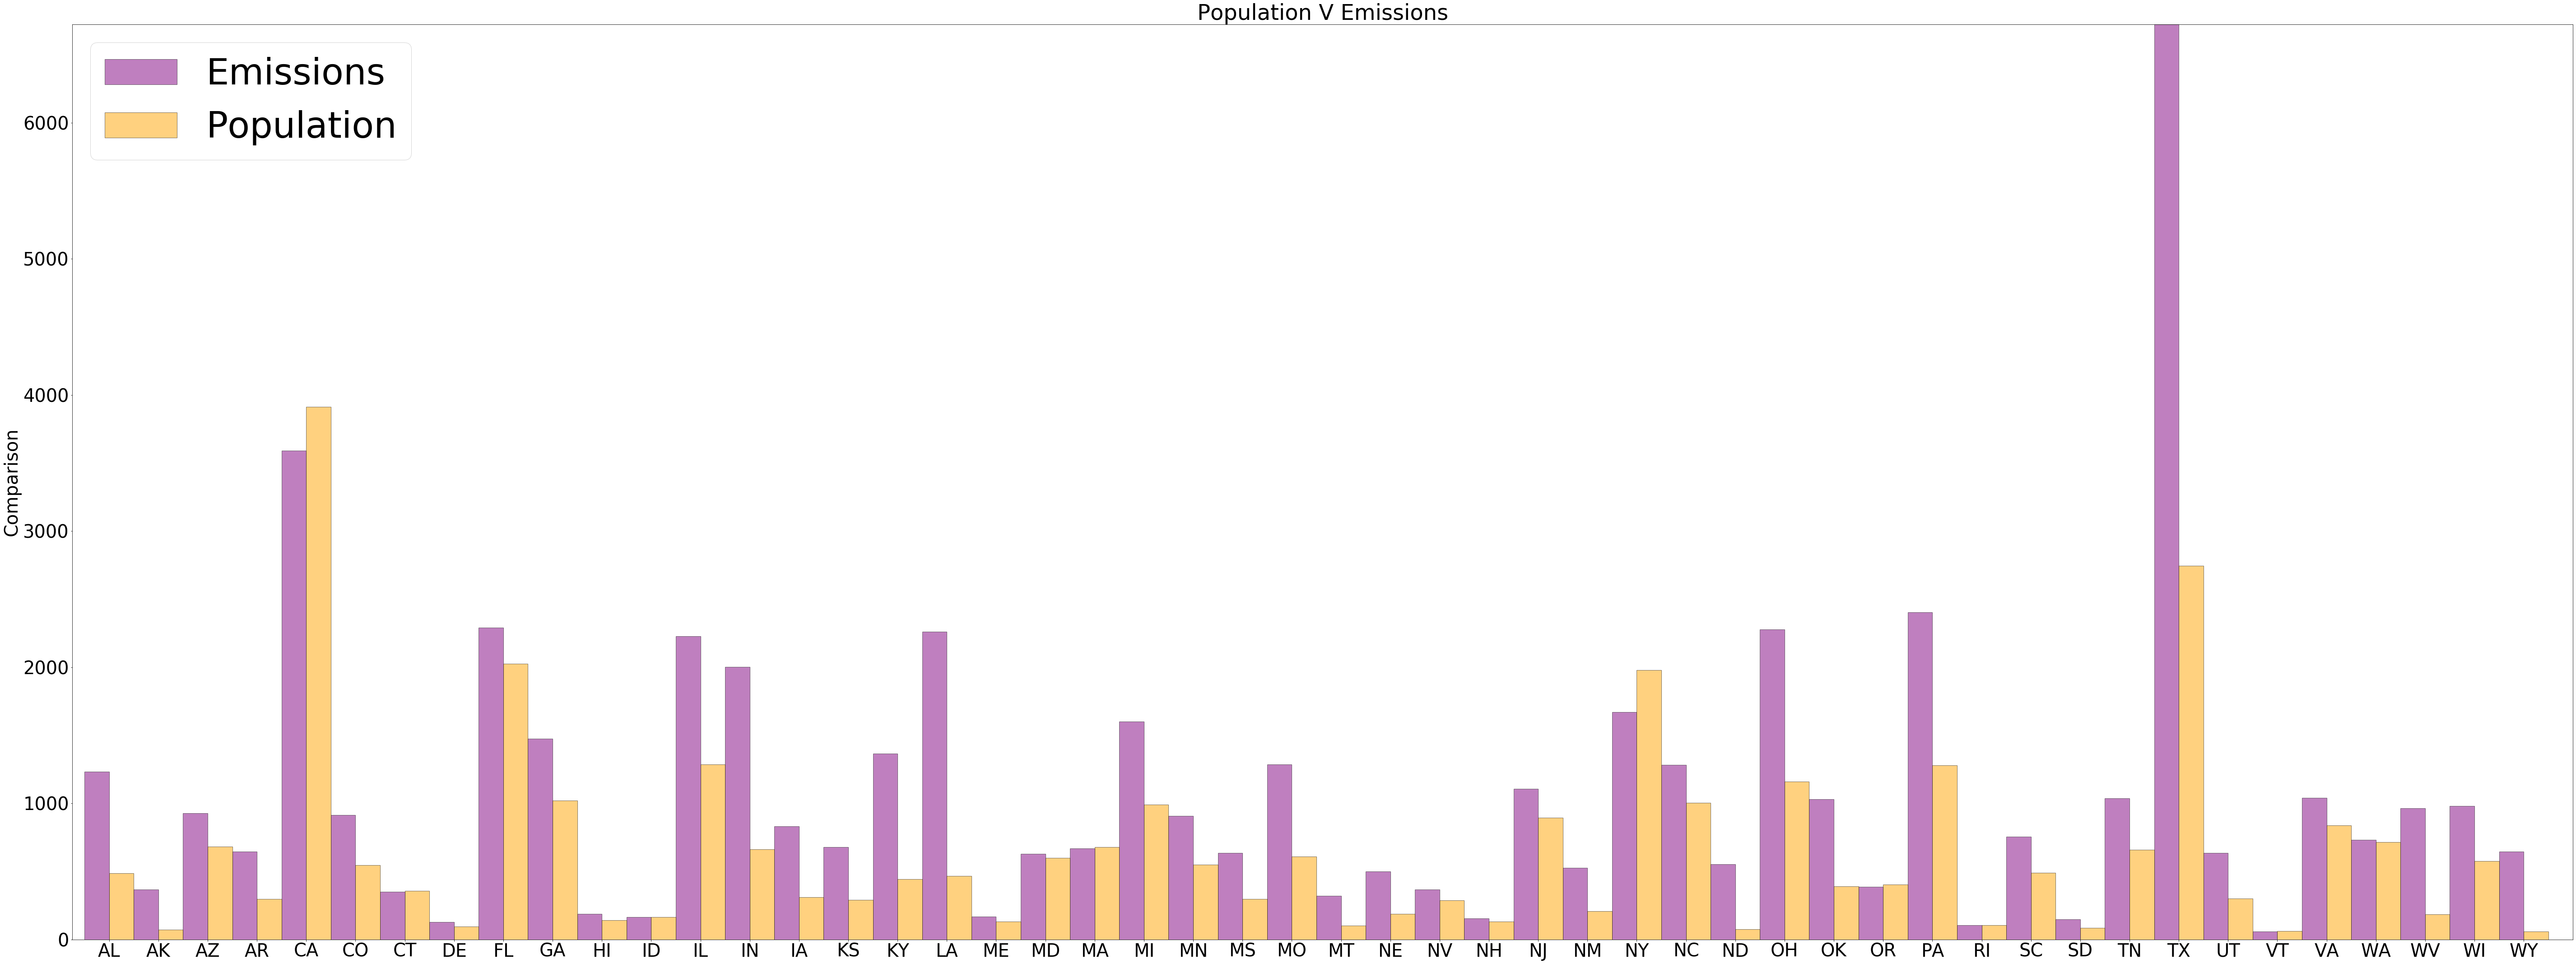

In [582]:
# I am trying to make a grouped bar chart to compare both to one another
# The plot is too narrow

labels = ttl_emissions['abbrev']
bars1 = ttl_emissions['total']
bars2 = clean_df['per 10']

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars


fig, ax = plt.subplots(figsize=(80,30))
rects1 = ax.bar(x - width/2, bars1, width, label='Emissions', color='purple', alpha=0.50, align="center", ec="black")
rects2 = ax.bar(x + width/2, bars2, width, label='Population', color='orange', alpha=0.50, align="center", ec="black")

plt.xlim(-0.75, len(x))
plt.ylim(0, max(ttl_emissions["total"]))
plt.tight_layout()

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Comparison')
ax.set_title('Population V Emissions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
tick_locations = [x for value in x_axis]
ax.legend(loc="upper left", fontsize=80)


plt.savefig(f"output/population_v_emissions.png")
plt.show()


In [312]:
years = state_emissions.keys()
plt.plot(years, ttl_emissions, color="red", label="State Emissions")
average_emissions

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
abbrev,,,,,,,,,,
OH,259.915008,234.975715,247.141718,235.368188,215.376323,229.601220,231.666146,212.891632,206.407588,205.621802
PA,267.457907,242.407980,254.419583,247.126263,236.353959,246.092075,245.894238,229.691958,216.636771,216.650887
TX,643.698700,611.110086,648.818958,666.708188,662.002423,696.845756,693.485215,693.100945,695.363753,710.994283
VT,5.901652,6.132742,5.854555,5.782272,5.430809,5.720077,5.867586,6.125115,5.917026,5.833906
WA,75.157759,72.977136,73.044555,68.149752,67.912628,72.679159,71.204237,73.062390,78.443075,78.732677


In [221]:
full_dataset = states.merge(state_emissions, on='abbrev')
full_dataset

,abbrev,state,population,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,OH,Ohio,11613423,259.915008,234.975715,247.141718,235.368188,215.376323,229.601220,231.666146,212.891632,206.407588,205.621802
1,PA,Pennsylvania,12802503,267.457907,242.407980,254.419583,247.126263,236.353959,246.092075,245.894238,229.691958,216.636771,216.650887
2,TX,Texas,27469114,643.698700,611.110086,648.818958,666.708188,662.002423,696.845756,693.485215,693.100945,695.363753,710.994283
3,VT,Vermont,626042,5.901652,6.132742,5.854555,5.782272,5.430809,5.720077,5.867586,6.125115,5.917026,5.833906
4,WA,Washington,7170351,75.157759,72.977136,73.044555,68.149752,67.912628,72.679159,71.204237,73.062390,78.443075,78.732677


In [321]:
# full_dataset.groupby(['','type']).count()['amount'].plot(ax=ax)
# plt.plot(x_plot, y_plot, color='red', marker='o')
# plt.title('Emmissions Per State', fontsize=14)
# plt.xlabel('Year', fontsize=14)
# plt.ylabel('State', fontsize=14)
# plt.grid(True)
# plt.show()